In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [12]:
target = (24,24)

In [13]:
data_generator = ImageDataGenerator(rescale=1/.255,
                                     shear_range = 0.2,
                                      horizontal_flip = True,
                                      validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1/.255,
                                     shear_range = 0.2,
                                      horizontal_flip = True)
train_data = data_generator.flow_from_directory('./data/training_data/',
                                                target_size=target,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                batch_size = 256,
                                                subset = 'training')
test_data = test_generator.flow_from_directory('./data/testing_data/',
                                                target_size=target,
                                                color_mode='grayscale',
                                                batch_size = 256,
                                                class_mode='categorical')
validation_data = data_generator.flow_from_directory('./data/training_data/',
                                                target_size=target,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                batch_size = 256,
                                                subset = 'validation')

Found 16524 images belonging to 36 classes.
Found 1008 images belonging to 36 classes.
Found 4104 images belonging to 36 classes.


In [14]:
import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (24,24,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.summary()

/Users/bhagya/Desktop/code/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,672 (362.00 KB)

 Trainable params: 92,672 (362.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(36, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,828 (444.64 KB)

 Trainable params: 113,828 (444.64 KB)

 Non-trainable params: 0 (0.00 B)

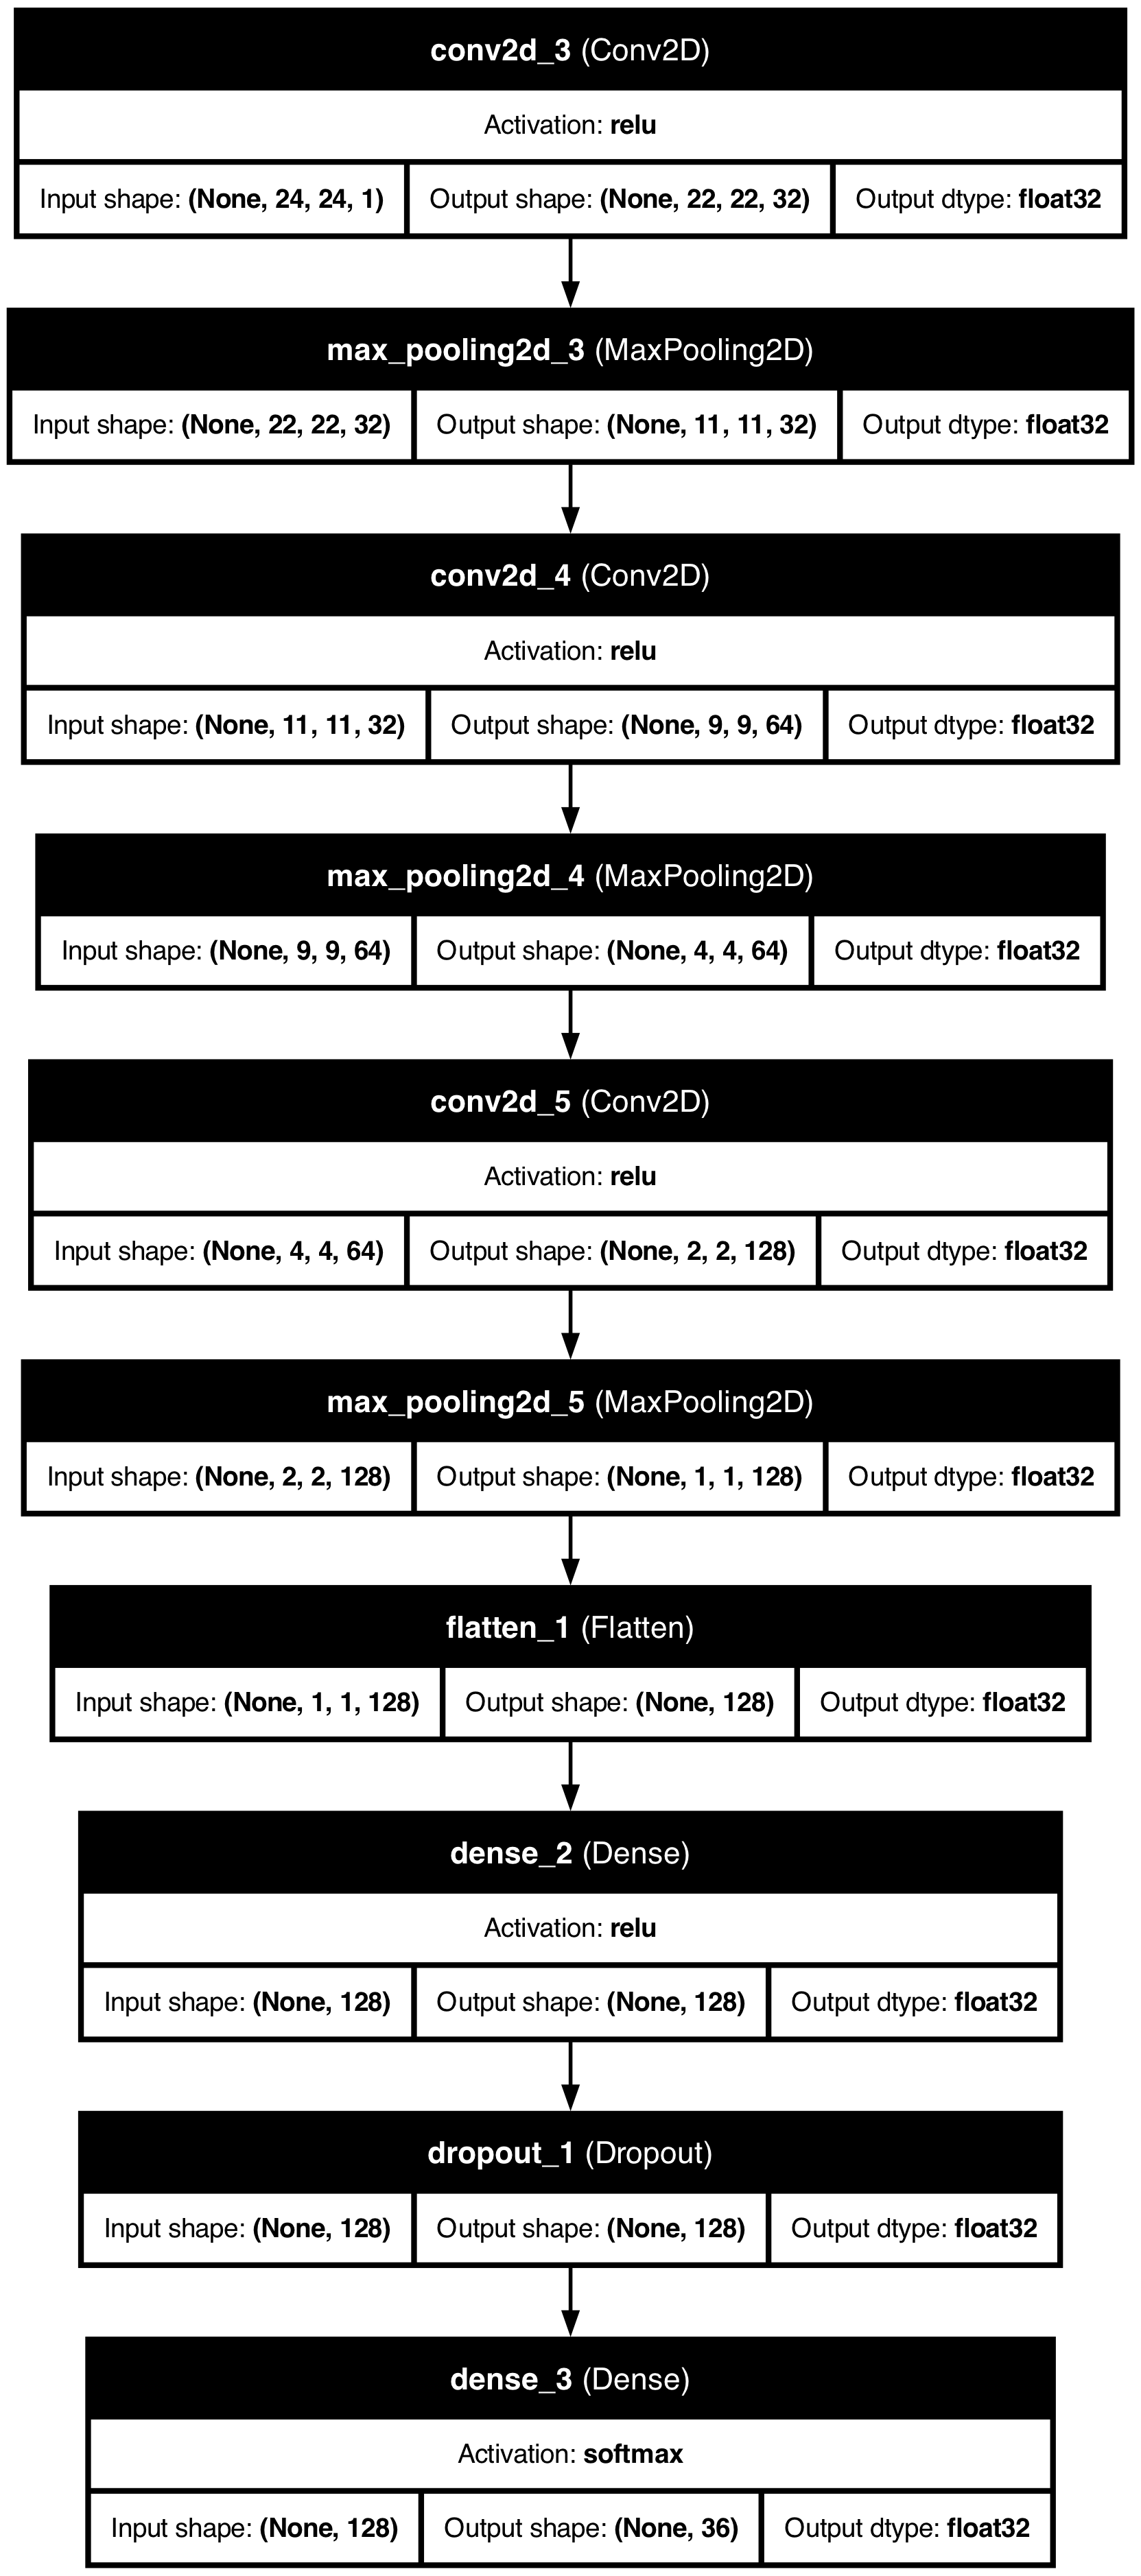

In [25]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    dpi=200,
    show_layer_activations=True,
)

In [18]:
model.fit(train_data, validation_data = validation_data, epochs=30)

Epoch 1/30


/Users/bhagya/Desktop/code/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.0475 - loss: 28.8047 - val_accuracy: 0.2230 - val_loss: 2.9194
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.2499 - loss: 2.7160 - val_accuracy: 0.5941 - val_loss: 1.4535
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5377 - loss: 1.5752 - val_accuracy: 0.7449 - val_loss: 0.9160
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.6740 - loss: 1.1063 - val_accuracy: 0.8095 - val_loss: 0.6821
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.7543 - loss: 0.8436 - val_accuracy: 0.8389 - val_loss: 0.5910
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.7955 - loss: 0.7092 - val_accuracy: 0.8509 - val_loss: 0.5458
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8228 - loss: 0.6036 - val_accuracy: 0.8672 - val_loss: 0.4727
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8428 - loss: 0.5461 - val_accuracy: 0.8745 - val_loss

In [19]:
model.save('ocr.h5')

In [20]:
model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9694 - loss: 0.0626


[0.05754790082573891, 0.9722222089767456]